## Assignment 1: Exploring and Visualizing Data
NOTE : PLEASE DO NOT POST THE CODE OR YOUR SOLUTIONS ON THE WEB/GIT except CANVAS FOR GRADING


This assignment focuses on the EDA process where you load, explore, visualize data and present your findings. 

Problem Statement : Choose a variable with meaningful magnitude and examine the effects of two transformations (scaling methods) on that variable.

Background Materials/Data : 
COVID 19 is an ongoing threat.  Data for the outbreak are available here:  
https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide 

Using this data, you are to conduct exploratory data analysis.  Provide appropriate descriptive statistics  / visualizations to help understand the spread of the disease (incidence) as well as its fatality rate.  You should also engage in feature creation and variable transformation.  At a bare minimum, feature creation should include generating rates per X in the population (i.e., rates per million).  Investigate time series as well as univariate and bivariate distribution graphs. 

Select one of variable and perform both min-max and standard scaling in Python.  
reference:  https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py 

Some methods we will learn in this course  (trees and random forests) are unaffected by monotonic transformations of the explanatory variables. Others (SVMs and neural networks) are very much affected by scaling and usually perform better when all explanatory variables have the same scale. It is often best to use scaling methods that preserve the shape of the distribution. But if there are extreme outliers or heavily skewed distributions, then log or normalizing transformations may be warranted.

Questions & Assumptions to Senior Managemment
- What are the management and analytical questions associated with this problem?
- What are some of the assumptions if any ?

Comment often and in detail, highlighting major sections of code, describing the thinking behind the programming methods being employed.

Python Programming
All programming will be done in Python.

-- Grading Guidelines (100 points)
1) Data preparation (20 points)
2) Data exploration (20 points)
3) Data visualization (20 points)
4) Data scaling and comparisons (20 points)
5) Insights from analysis (20 points)

Deliverables and File Formats
you can use this notebook to update comments or Provide a double-spaced paper with a two-page maximum for the text. The paper should include all a discussion of all graded elements but focus particularly on insights. Include your Python code and output as an appendix.  Upload the notebook and/or as a single .pdf file.

Formatting Python Code
Refer to Google’s Python Style Guide (https://google.github.iostyleguide/pyguide.html) for ideas about formatting Python code:


NOTE : 
- Below is the starter code and please feel free to update/edit/change to provide your thoughts/solutions to the problem. 
- Comment often and in detail, highlighting major sections of code, describing the thinking behind the programming methods being employed.

##### Data Dictionary COVID-19 

The dataset data frame has 32771 rows and 10 columns.<br>
This data frame contains the following columns:<br>
<b>Date</b><br>
Formatted  datetime64[ns]<br>
<b>Day</b><br>
Calendar day, dtype int64<br>
<b>Month</b><br>
Calendar month, dtype int64<br>
<b>Year</b><br>
Calendar year, dtype int64<br>
<b>Cases</b><br>
Number of Cases Per Day, dtype int64<br>
<b>Deaths</b><br>
Number of Deaths, dtype int64<br>
<b>Country </b><br>
Country Name, dtype object<br>
<b>Population</b><br>
Country Population<br>
<b>Continent</b><br>
Continent continuous expanses of land (Africa, Antarctica, Asia, Australia, Europe, North America, South America)<br>
<b>CumulativeNumberPer100KCases </b><br>
Cumulative Number For 14 Days of COVID-19 Cases per 100000<br>
<b>Sources:</b><br>

In [11]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [ ]:
pip install --upgrade pip

     |████████████████████████████████| 1.5MB 9.6MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [ ]:
!pip install prettytable
!pip install geopandas

     |████████████████████████████████| 962 kB 9.6 MB/s 
     |████████████████████████████████| 6.4 MB 13.6 MB/s 
     |████████████████████████████████| 14.8 MB 43.3 MB/s 


In [12]:
###Loading Packages###
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map
import re # regular expressions
import scipy
import os # Operation System
import geopandas as gpd
from prettytable import PrettyTable
import seaborn as sns
import sklearn
import math
from datetime import datetime

In [ ]:
# output of plotting commands is displayed inline directly below the code cell that produced it
%matplotlib inline

##### Load Data (for Colab/Google Drive)
##### S2 Mount Google Drive to Colab Enviorment
from google.colab import drive
drive.mount('/content/gdrive')

In [13]:
#S2 Mount Google Drive to Colab Enviorment
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#S3 Establish working directory
import os # Operation System
os.getcwd()
%cd /content/gdrive/My Drive/Assignments/1/
!pwd
!ls
print('Working Directory')
print(os.getcwd())

In [15]:
##### Load Data 
work_dir = " /content/gdrive/My Drive/1/"
covid19_dfA=pd.read_csv('./data.csv')

In [18]:
# Check few columns to make sure the data is loaded properly
covid19_dfA.head()

,Date,Day,Month,Year,Cases,Deaths,Country,Population,Continent,CumulativeNumberPer100KCases
0,25/08/2020,25,8,2020,71,10,Afghanistan,38041757,Asia,2.670749
1,24/08/2020,24,8,2020,0,0,Afghanistan,38041757,Asia,2.484112
2,23/08/2020,23,8,2020,105,2,Afghanistan,38041757,Asia,2.484112
3,22/08/2020,22,8,2020,38,0,Afghanistan,38041757,Asia,2.310619
4,21/08/2020,21,8,2020,97,2,Afghanistan,38041757,Asia,2.415766


#### Common functions/libraries

In [16]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')
    plt.show()
    plt.close()

np.set_printoptions(precision=3)

In [17]:
# overrides the default rcParams for plotting
def init_plotting():
    plt.style.use(style='ggplot')
    plt.rcParams['figure.figsize'] = (10.0, 8.0)
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['text.color'] = 'black'
    plt.rcParams['axes.labelcolor'] = 'black'
    plt.rcParams['xtick.color']= 'black'
    plt.rcParams['ytick.color']= 'black'

init_plotting()

# avoid empty plot, always good to close plot
plt.close()

#### Exploratory Data Analysis (EDA) 

In [ ]:
# Get an understanding of the data
print("Shape:", covid19_dfA.shape,"\n")
print("Variable Types:") 
print(covid19_dfA.dtypes)

covid19_dfA.head(15)

Shape: (38492, 10) 

Variable Types:
Date                              object
Day                                int64
Month                              int64
Year                               int64
Cases                              int64
Deaths                             int64
Country                           object
Population                         int64
Continent                         object
CumulativeNumberPer100KCases     float64
dtype: object


,Date,Day,Month,Year,Cases,Deaths,Country,Population,Continent,CumulativeNumberPer100KCases
0,25/08/2020,25,8,2020,71,10,Afghanistan,38041757,Asia,2.670749
1,24/08/2020,24,8,2020,0,0,Afghanistan,38041757,Asia,2.484112
2,23/08/2020,23,8,2020,105,2,Afghanistan,38041757,Asia,2.484112
3,22/08/2020,22,8,2020,38,0,Afghanistan,38041757,Asia,2.310619
4,21/08/2020,21,8,2020,97,2,Afghanistan,38041757,Asia,2.415766
5,20/08/2020,20,8,2020,160,8,Afghanistan,38041757,Asia,2.268560
6,19/08/2020,19,8,2020,0,0,Afghanistan,38041757,Asia,2.024092
7,18/08/2020,18,8,2020,3,0,Afghanistan,38041757,Asia,2.239644
8,17/08/2020,17,8,2020,45,5,Afghanistan,38041757,Asia,2.329020
9,16/08/2020,16,8,2020,120,7,Afghanistan,38041757,Asia,2.210729


In [20]:
### examine the structure of the DataFrame object###
print('\nContents of covid19 data ---------------')

# could use len() or first index of shape() to get number of rows/observations
print('\nNumber of Cases =', len(covid19_dfA), '\n') 

# show the column/variable names of the DataFrame
# note that RespondentID is no longer present
covid19_dfA.columns

# abbreviated printing of the first five rows of the data frame
print(pd.DataFrame.head(covid19_dfA))


Contents of covid19 data ---------------

Number of Cases = 38492 

         Date  Day  Month  ...  Population  Continent  CumulativeNumberPer100KCases 
0  25/08/2020   25      8  ...    38041757       Asia                       2.670749
1  24/08/2020   24      8  ...    38041757       Asia                       2.484112
2  23/08/2020   23      8  ...    38041757       Asia                       2.484112
3  22/08/2020   22      8  ...    38041757       Asia                       2.310619
4  21/08/2020   21      8  ...    38041757       Asia                       2.415766

[5 rows x 10 columns]


In [23]:
# Number of countries
len(covid19_dfA.Country.unique())

210

<div class="alert alert-block alert-warning">
Attention to the <b>count</b> row will indicate if column has missing records
</div> 

In [24]:
# summary statistics
covid19_dfA.describe()

,Day,Month,Year,Cases,Deaths,Population,CumulativeNumberPer100KCases
count,38492.000000,38492.000000,38492.000000,38492.000000,38492.000000,3.849200e+04,38492.000000
mean,15.810558,5.192585,2019.998259,615.382937,21.247376,4.384876e+07,27.128374
std,8.694756,1.995496,0.041685,3815.217442,125.237191,1.598573e+08,67.447288
min,1.000000,1.000000,2019.000000,0.000000,0.000000,8.150000e+02,-1.262589
25%,8.000000,4.000000,2020.000000,0.000000,0.000000,1.394969e+06,0.060058
50%,16.000000,5.000000,2020.000000,7.000000,0.000000,8.519373e+06,2.882863
75%,23.000000,7.000000,2020.000000,126.000000,2.000000,3.036604e+07,19.221559
max,31.000000,12.000000,2020.000000,78427.000000,4928.000000,1.433784e+09,1058.225943


### Review Dataset for Missing Values

<div class="alert alert-block alert-warning">
Review dataset for missing records
</div>

In [ ]:
covid19_dfA.isnull().sum()

Date                             0
Day                              0
Month                            0
Year                             0
Cases                            0
Deaths                           0
Country                          0
Population                       0
Continent                        0
CumulativeNumberPer100KCases     0
dtype: int64

## Preprocess Data for Analysis

#### Date Column formatted into ISO 8601 standard format (Year - Month - Day)

In [ ]:
covid19_dfA['Date']=pd.to_datetime(covid19_dfA['Date'], format='%d/%m/%Y').dt.strftime('%Y%m%d')
covid19_dfA['Date']=pd.to_datetime(covid19_dfA['Date'], format='%Y/%m/%d')
covid19_dfA['Date'].head()

0   2020-08-25
1   2020-08-24
2   2020-08-23
3   2020-08-22
4   2020-08-21
Name: Date, dtype: datetime64[ns]

#### Review Data Types (dtypes)

In [25]:
covid19_dfA.dtypes

Date                              object
Day                                int64
Month                              int64
Year                               int64
Cases                              int64
Deaths                             int64
Country                           object
Population                         int64
Continent                         object
CumulativeNumberPer100KCases     float64
dtype: object

In [26]:
covid19_dfA.isnull().sum()

Date                             0
Day                              0
Month                            0
Year                             0
Cases                            0
Deaths                           0
Country                          0
Population                       0
Continent                        0
CumulativeNumberPer100KCases     0
dtype: int64

In [27]:
covid19_dfA.head()

,Date,Day,Month,Year,Cases,Deaths,Country,Population,Continent,CumulativeNumberPer100KCases
0,25/08/2020,25,8,2020,71,10,Afghanistan,38041757,Asia,2.670749
1,24/08/2020,24,8,2020,0,0,Afghanistan,38041757,Asia,2.484112
2,23/08/2020,23,8,2020,105,2,Afghanistan,38041757,Asia,2.484112
3,22/08/2020,22,8,2020,38,0,Afghanistan,38041757,Asia,2.310619
4,21/08/2020,21,8,2020,97,2,Afghanistan,38041757,Asia,2.415766


In [28]:
covid19_dfA.shape

(38492, 10)

In [29]:
covid19_dfA.dtypes

Date                              object
Day                                int64
Month                              int64
Year                               int64
Cases                              int64
Deaths                             int64
Country                           object
Population                         int64
Continent                         object
CumulativeNumberPer100KCases     float64
dtype: object

### Write out file</br>
> - covid19_dfA.to_excel()</br>
> - covid19_dfA.to_csv()</br>

## Visualizing Data

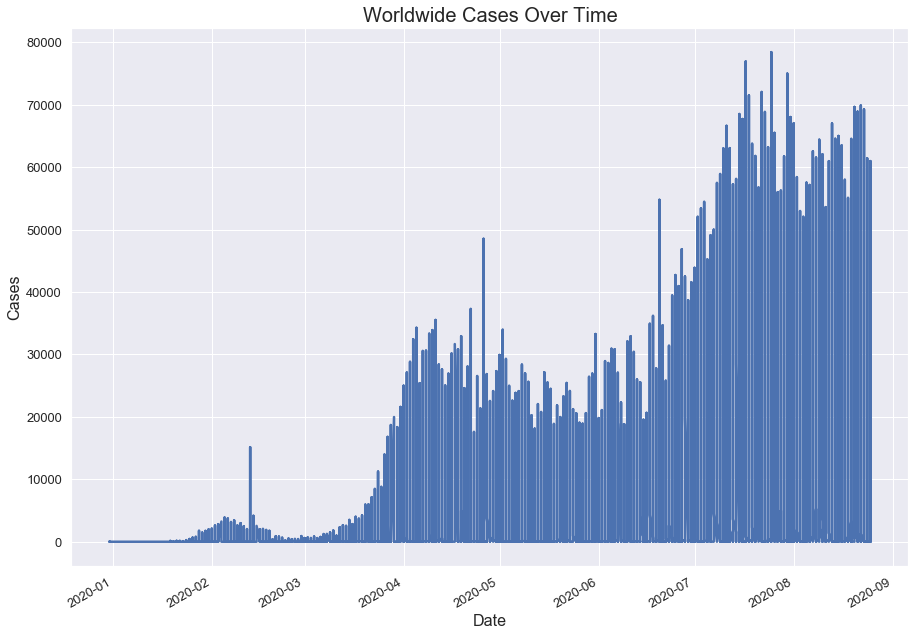

In [ ]:
world_daily = covid19_dfA.set_index('Date')
sns.set_color_codes("colorblind")
sns.set(rc={'figure.figsize':(15, 11)})
world_daily['Cases'].plot(linewidth = 2.5)


plt.title('Worldwide Cases Over Time', fontsize = 20)
plt.xlabel('Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Cases', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

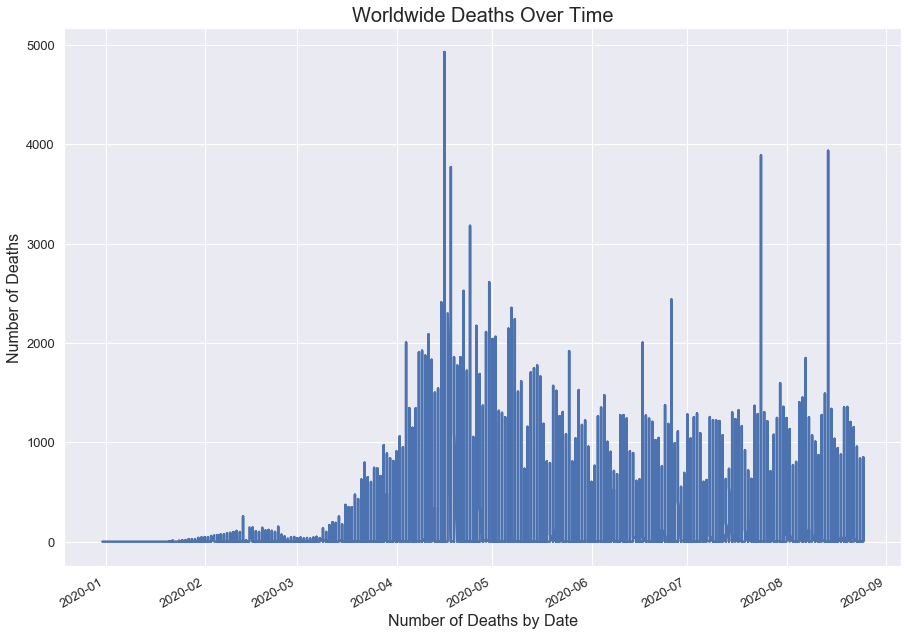

In [ ]:
sns.set(rc={'figure.figsize':(15,11)})
world_daily['Deaths'].plot(linewidth = 2.5)


plt.title('Worldwide Deaths Over Time', fontsize = 20)
plt.xlabel('Number of Deaths by Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Deaths', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

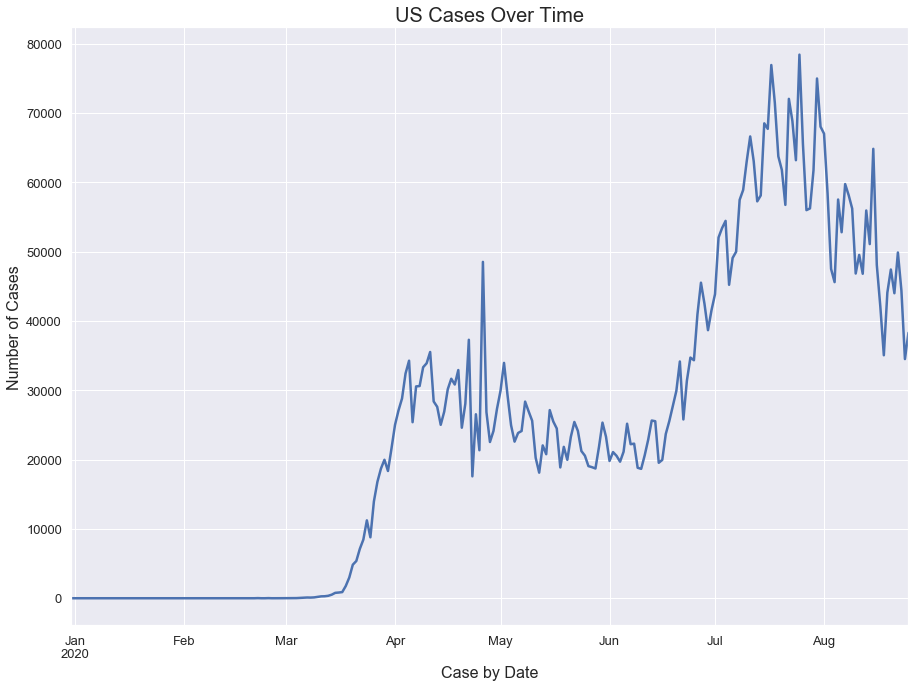

In [ ]:
UScovid19_df = covid19_dfA[covid19_dfA["Country"] == "United_States_of_America"].reset_index()
US_daily = UScovid19_df.set_index('Date')

sns.set(rc={'figure.figsize':(15, 11)})
US_daily['Cases'].plot(linewidth = 2.5)

plt.title('US Cases Over Time', fontsize = 20)
plt.xlabel('Case by Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Cases', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

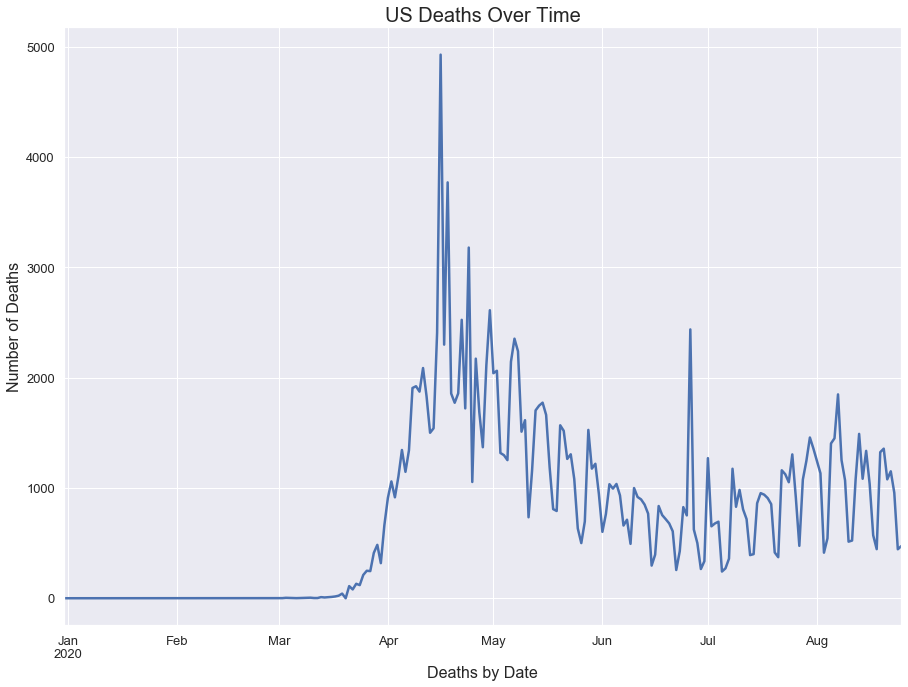

In [ ]:
UScovid19_df = covid19_dfA[covid19_dfA["Country"] == "United_States_of_America"].reset_index()
US_daily = UScovid19_df.set_index('Date')

sns.set(rc={'figure.figsize':(15, 11)})
US_daily['Deaths'].plot(linewidth = 2.5)

plt.title('US Deaths Over Time', fontsize = 20)
plt.xlabel('Deaths by Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Deaths', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

#### Data Scaling & Comparisons






FINDINGS/ANALYSIS:

